# Heart Disease Checkpoint

# Data exploration

In this phase, we will import the data using Pandas and show the head of the dataset then some general information about the data columns and values.

As a next step, we will preprocess the data : find missing information, replace it with the appropriate values and verify that the data is ready to be treated.

In [1]:
# First of all, we need to import the Python pandas library
import pandas as pd

In [2]:
# We read the dataset through the read_csv() function
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### General information

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


This dataset has 303 examples and 14 columns (**13 features** + the **target** variable). 13 of the columns are integers and 1 is float.

Columns descriptions :
- **age**
- **sex**
- **cp** : chest pain type (4 values)
- **trestbps** : resting blood pressure
- **chol** : serum cholestoral in mg/dl
- **fbs** : fasting blood sugar > 120 mg/dl
- **restecg** : resting electrocardiographic results (values 0,1,2)
- **thalach** : maximum heart rate achieved
- **exang** : exercise induced angina
- **oldpeak** : ST depression induced by exercise relative to rest
- **slope** : the slope of the peak exercise ST segment
- **ca** : number of major vessels (0-3) colored by flourosopy
- **thal** : 0 = normal; 1 = fixed defect; 2 = reversable defect

There are no missing values. Perfect!

#### We need to convert some columns to "category" type

In [4]:
data.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [5]:
data.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [6]:
data.fbs.value_counts()

0    258
1     45
Name: fbs, dtype: int64

In [7]:
data.restecg.value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

In [8]:
data.exang.value_counts()

0    204
1     99
Name: exang, dtype: int64

In [9]:
data.slope.value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

In [10]:
data.ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [11]:
data.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [12]:
lst = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

data[lst] = data[lst].astype("category")

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalach   303 non-null    int64   
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    category
 11  ca        303 non-null    category
 12  thal      303 non-null    category
 13  target    303 non-null    int64   
dtypes: category(8), float64(1), int64(5)
memory usage: 17.9 KB


In [14]:
# Descriptive statistics about the data
data.describe()

,age,trestbps,chol,thalach,oldpeak,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.544554
std,9.082101,17.538143,51.830751,22.905161,1.161075,0.498835
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,1.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,1.000000


We can see that the age range from 29 to 77 with a mean of 54 yo.

## Data Visualization

Let's visualize the distribution of some columns before applying ML models

In [15]:
# We need to import the Python visualization libraries : Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Categorical variables

In [16]:
# We create a function to generate a Pie Chart and an Histogram of a categorical feature 
# based on data, column, labels and Title as input

def cat_feature_visualization(data, column, labels, Title) :
    order = data[column].value_counts().index

    # --- Size for Both Figures ---
    plt.figure(figsize = (12, 6))
    plt.suptitle(Title, fontweight = 'heavy', fontsize = '16', fontfamily = 'sans-serif')

    # --- Pie Chart ---
    plt.subplot(1, 2, 1)
    plt.title('Pie Chart', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif')
    plt.pie(data[column].value_counts(), labels = labels, pctdistance = 0.7, autopct = '%.2f%%', 
            wedgeprops = dict(alpha = 0.8), textprops = {'fontsize':12})
    centre = plt.Circle((0, 0), 0.45, fc = 'white')
    plt.gcf().gca().add_artist(centre)

    # --- Histogram ---
    countplt = plt.subplot(1, 2, 2)
    plt.title('Histogram', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif')
    ax = sns.countplot(x = column, data = data, order = order, alpha = 0.85)
    for rect in ax.patches:
        ax.text (rect.get_x() + rect.get_width() / 2, 
                 rect.get_height() + 4.25, rect.get_height(), 
                 horizontalalignment = 'center', fontsize = 10, 
                 bbox = dict(facecolor = 'none', linewidth = 0.25, boxstyle = 'round'))

    plt.xlabel(column, fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif')
    plt.ylabel('Total', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif')
    plt.xticks(list(range(len(labels))), labels)
    plt.grid(axis = 'y', alpha = 0.4)
    plt.show()

### Sex (Gender) Distribution

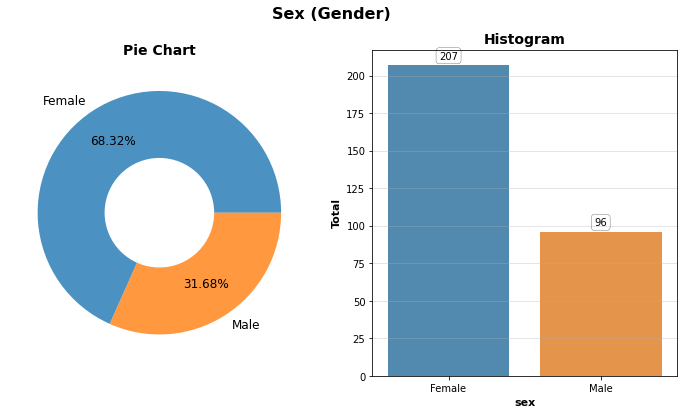

In [17]:
cat_feature_visualization(data, "sex", ['Female', 'Male'], "Sex (Gender)")

### cp (Chest Pain Type) Distribution

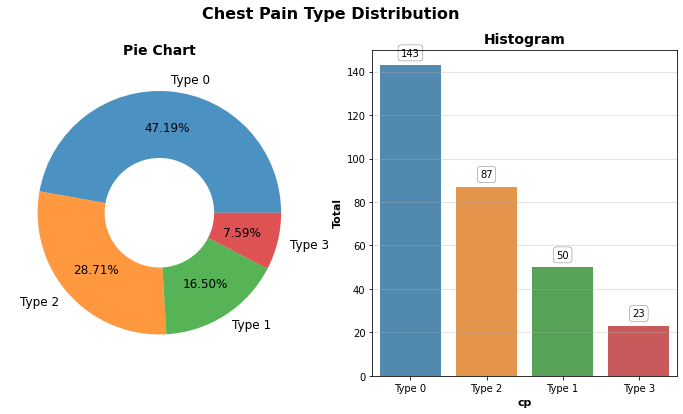

In [18]:
cat_feature_visualization(data, "cp", ['Type 0', 'Type 2', 'Type 1', 'Type 3'], "Chest Pain Type Distribution")

### fbs (Fasting Blood Sugar) Distribution

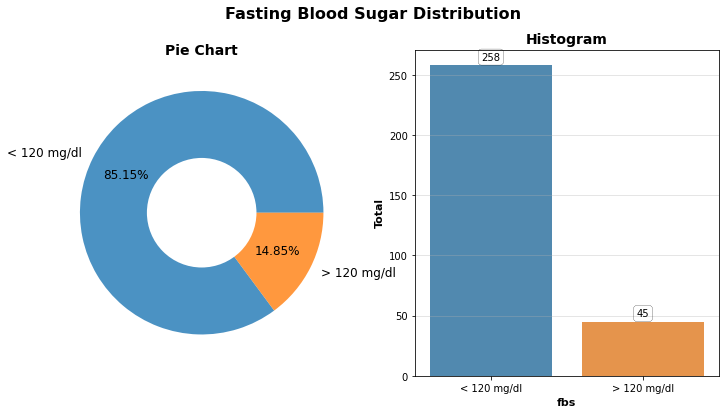

In [19]:
cat_feature_visualization(data, "fbs", ['< 120 mg/dl', '> 120 mg/dl'], "Fasting Blood Sugar Distribution")

### restecg (Resting Electrocardiographic Results) Distribution

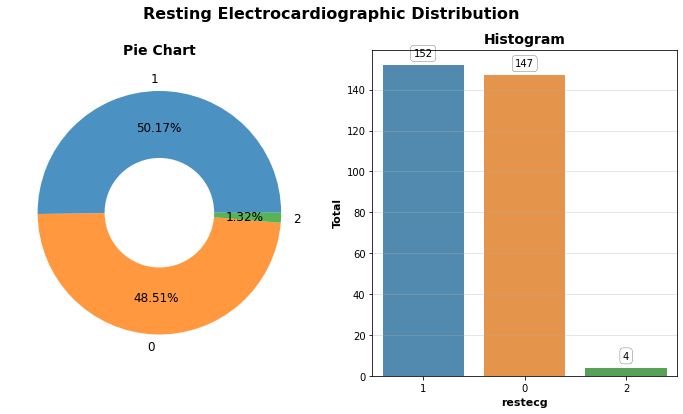

In [20]:
cat_feature_visualization(data, "restecg", ['1', '0', '2'], "Resting Electrocardiographic Distribution")

### exang (Exercise Induced Angina) Distribution

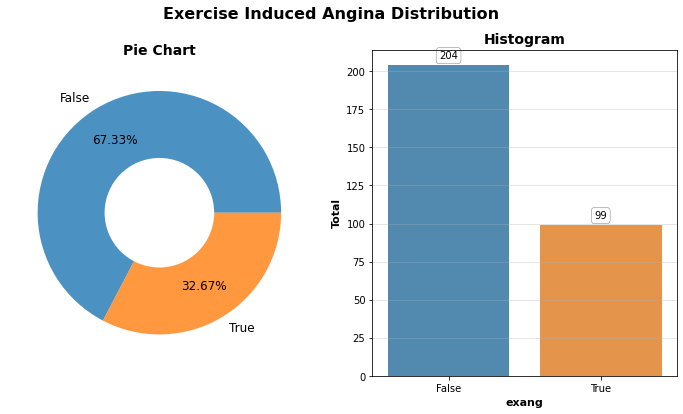

In [21]:
cat_feature_visualization(data, "exang", ['False', 'True'], "Exercise Induced Angina Distribution")

### slope (Slope of the Peak Exercise) Distribution

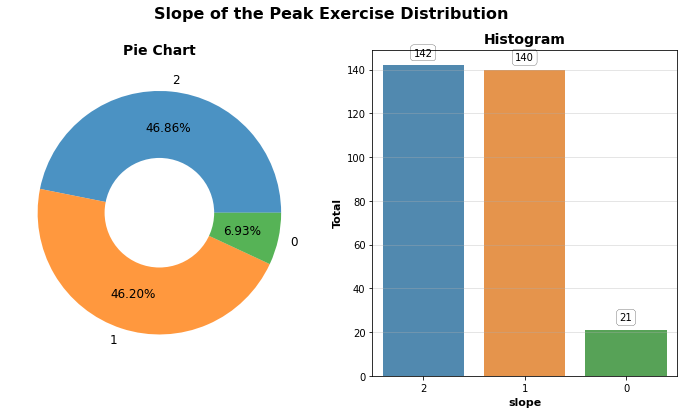

In [22]:
cat_feature_visualization(data, "slope", ['2', '1', '0'], "Slope of the Peak Exercise Distribution")

### ca (Number of Major Vessels) Distribution

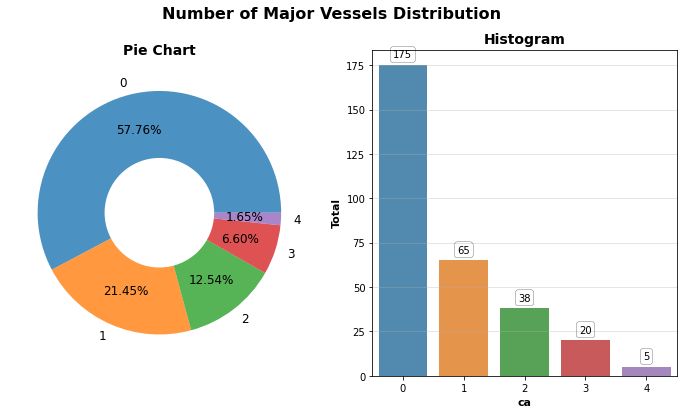

In [23]:
cat_feature_visualization(data, "ca", ['0', '1', '2', '3', '4'], "Number of Major Vessels Distribution")

### thal Distribution

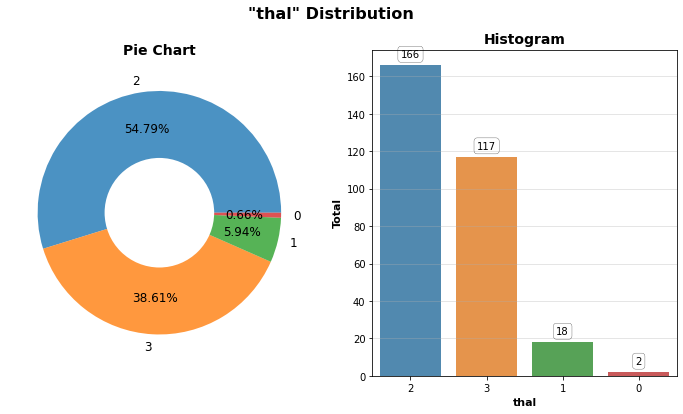

In [24]:
cat_feature_visualization(data, "thal", ['2', '3', '1', '0'],'"thal" Distribution')

### target (Heart Diseases Status) Distribution

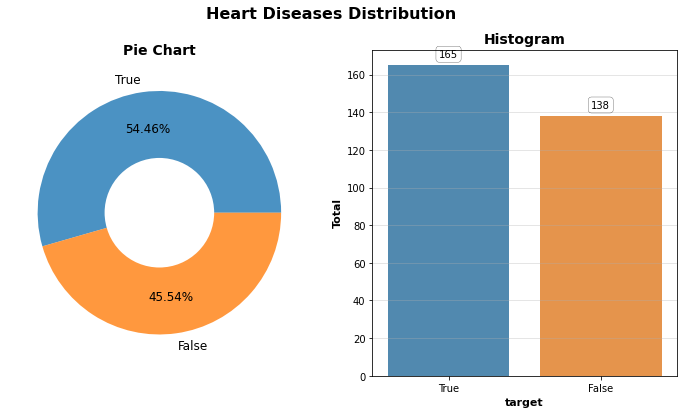

In [25]:
cat_feature_visualization(data, "target", ['True', 'False'], "Heart Diseases Distribution")

## 2. Numerical Variables

In [26]:
# We create a function to generate a Box plot and an Histogram of a continous numerical feature 
# based on data, var and Title as input

def num_feature_visualization(data, var, Title) :

    fig = plt.figure(figsize = (12, 8))

    # --- General Title ---
    fig.suptitle(Title, fontweight = 'bold', fontsize = 16, fontfamily = 'sans-serif')
    
    # --- Histogram ---
    ax_1 = fig.add_subplot(1, 2, 1)
    plt.title('Histogram Plot', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif')
    sns.histplot(data = data, x = var, kde = True)
    plt.xlabel('Total', fontweight = 'regular', fontsize = 11, fontfamily = 'sans-serif')
    plt.ylabel('Age', fontweight = 'regular', fontsize = 11, fontfamily = 'sans-serif')

    # --- Box Plot ---
    ax_2 = fig.add_subplot(1, 2, 2)
    plt.title('Box Plot', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif')
    sns.boxplot(data = data, y = var, boxprops = dict(alpha = 0.8), linewidth = 1.5)
    plt.ylabel(var, fontweight = 'regular', fontsize = 11, fontfamily = 'sans-serif')
    plt.show()

### Age Distribution

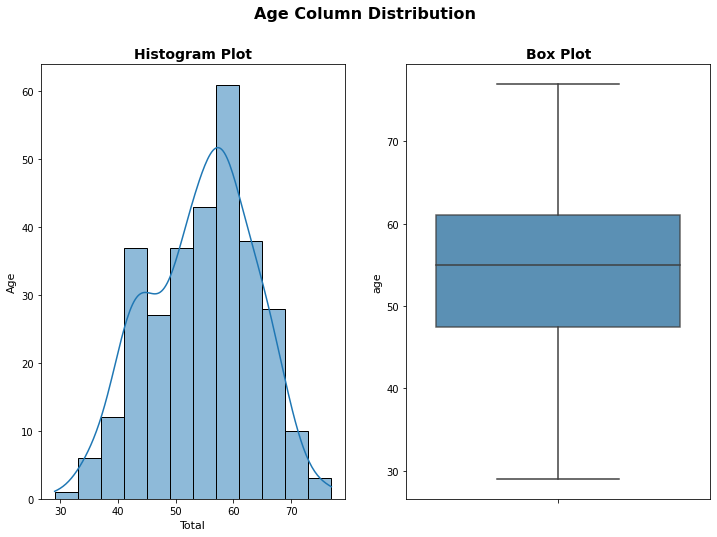

In [27]:
num_feature_visualization(data, "age", "Age Column Distribution")

### trestbps (Resting Blood Pressure in mm Hg) Distribution

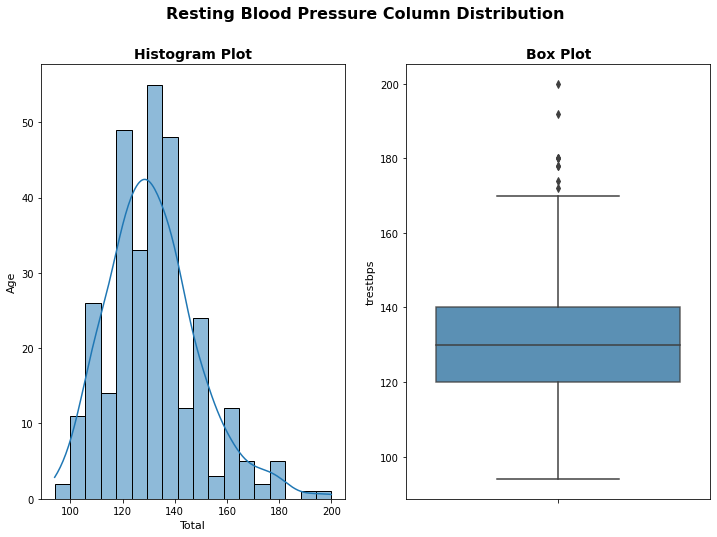

In [28]:
num_feature_visualization(data, "trestbps", "Resting Blood Pressure Column Distribution")

We can detect some outliers based on the Box Plot.

### chol (Serum Cholestoral in mg/dl) Distribution

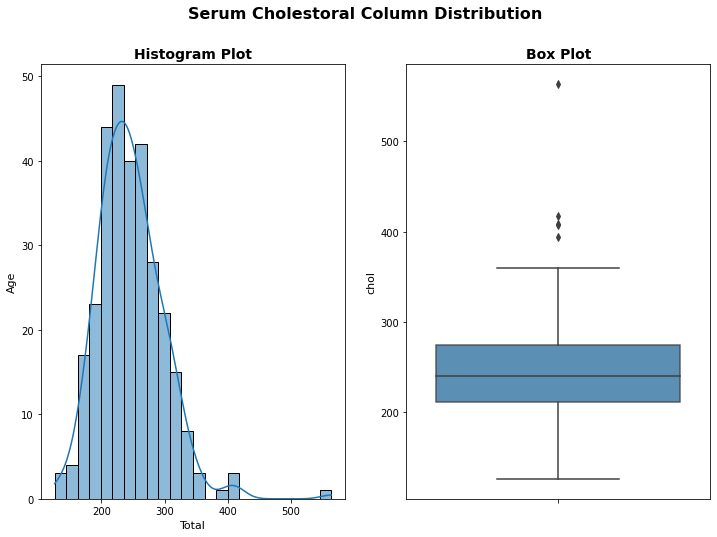

In [29]:
num_feature_visualization(data, "chol", "Serum Cholestoral Column Distribution")

We can detect some outliers based on the Box Plot.

### thalach (Maximum Heart Rate) Distribution

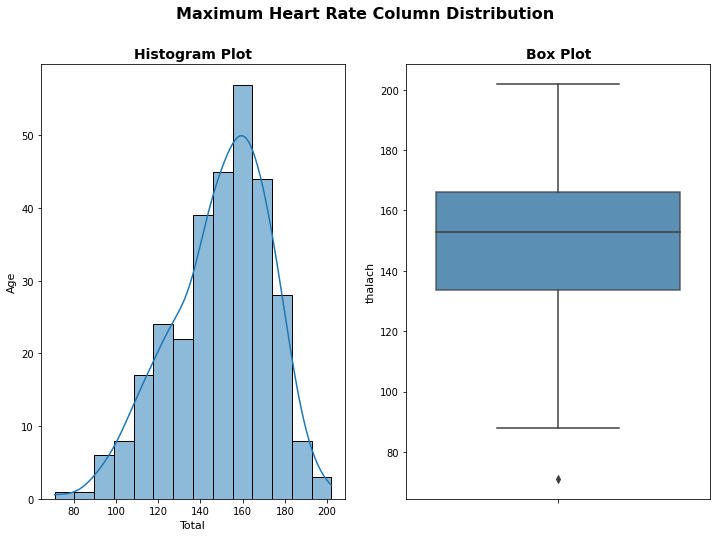

In [30]:
num_feature_visualization(data, "thalach", "Maximum Heart Rate Column Distribution")

We can detect some outliers based on the Box Plot.

### oldpeak Distribution

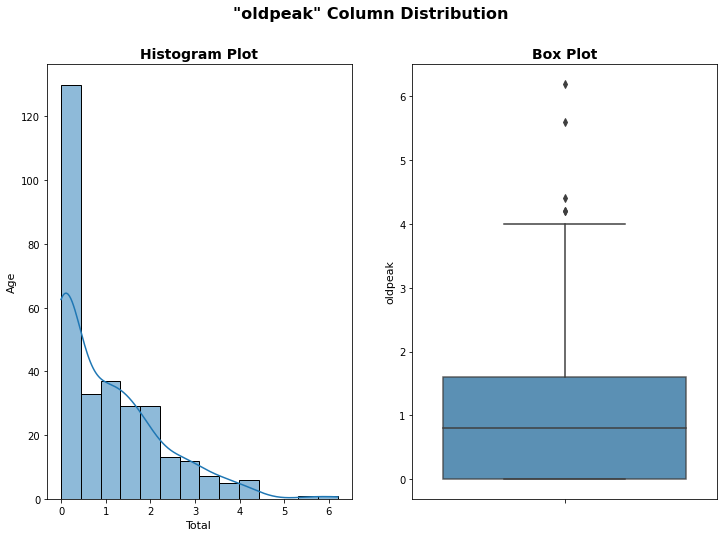

In [31]:
num_feature_visualization(data, "oldpeak", '"oldpeak" Column Distribution')

We can detect some outliers based on the Box Plot.

## EDA

Let's get more insights about the data.

### Heart Disease Distribution based on Gender

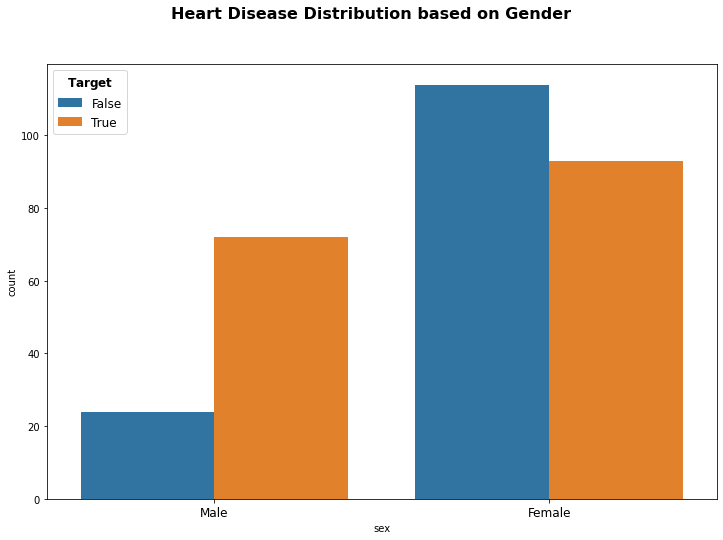

In [32]:
fig = plt.figure(figsize = (12,8))
fig.suptitle("Heart Disease Distribution based on Gender", fontweight = 'bold', fontsize = 16, fontfamily = 'sans-serif')
sns.countplot(data = data, x = 'sex', hue = 'target')
plt.xticks([0,1], ['Male', 'Female'], fontsize = '12', rotation = 0)
plt.legend(labels = ['False', 'True'], title = '$\\bf{Target}$', fontsize = '12', 
           title_fontsize = '12', loc = 'upper left', frameon = True);
plt.show()

Female tend to have heart diseases compared to Male. In male, the distribution is not imbalanced compared to female that have almost the same distribution.

### Heart Disease Distribution based on Major Vessels Total

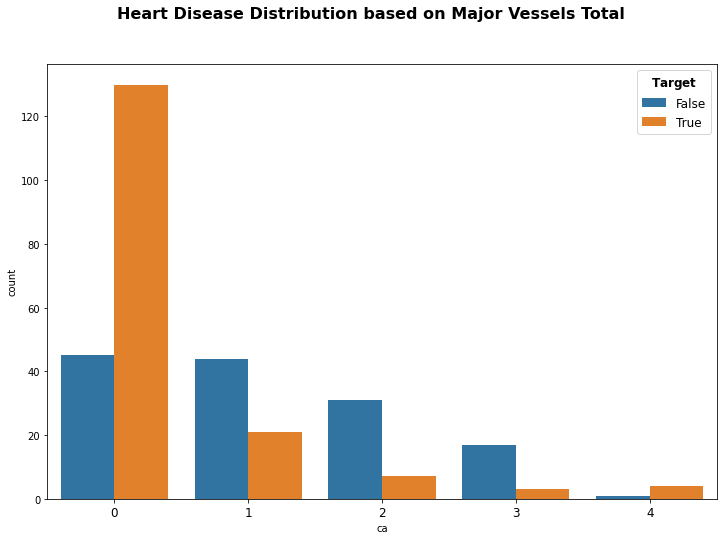

In [33]:
fig = plt.figure(figsize = (12,8))
fig.suptitle("Heart Disease Distribution based on Major Vessels Total", fontweight = 'bold', fontsize = 16, fontfamily = 'sans-serif')
sns.countplot(data = data, x = 'ca', hue = 'target')
plt.xticks(fontsize = '12', rotation = 0)
plt.legend(labels = ['False', 'True'], title = '$\\bf{Target}$', fontsize = '12', 
           title_fontsize = '12', loc = 'upper right', frameon = True);
plt.show()

Patients with 0 and 4 major vessels tend to have heart diseases. However, patients who have a number of vessels 1 to 3 tend not to have heart diseases.

### Heart Disease Scatter Plot based on Age

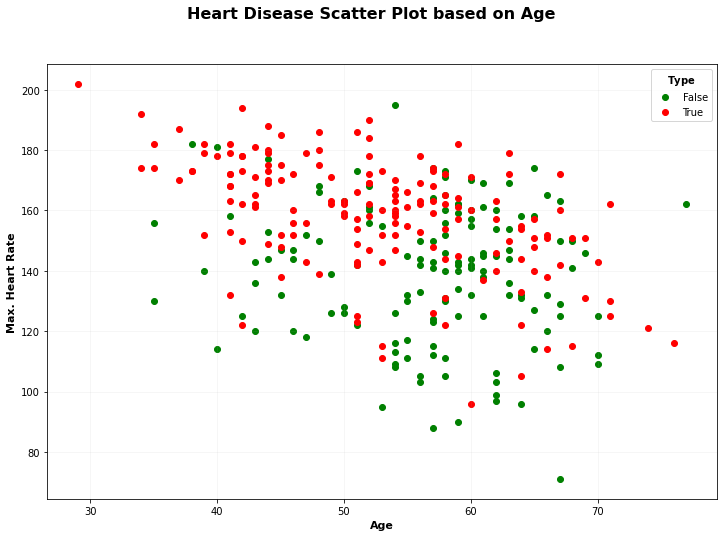

In [34]:
fig = plt.figure(figsize = (12,8))
fig.suptitle("Heart Disease Scatter Plot based on Age", fontweight = 'bold', fontsize = 16, fontfamily = 'sans-serif')
plt.scatter(x = data.age[data.target==0], y = data.thalach[(data.target==0)], c = "green")
plt.scatter(x = data.age[data.target==1], y = data.thalach[(data.target==1)], c = "red")
plt.legend(['False', 'True'], title = '$\\bf{Type}$', fontsize = '10', 
           title_fontsize = '10', loc = 'upper right', frameon = True)
plt.xlabel('Age', fontweight = 'bold', fontsize = '11', fontfamily = 'sans-serif')
plt.ylabel('Max. Heart Rate', fontweight='bold', fontsize='11', fontfamily='sans-serif')
plt.grid(axis = 'both', alpha = 0.2, lw = 0.5)
plt.show()

Based on age, patients with and without heart diseases mostly between 50-70 years old. Patients with heart diseases tend to have high heart rate compared to patients with no heart diseases.

### Correlation Map

Below is correlation map/heatmap of numerical variables to show correlation level/values for each variables with others.

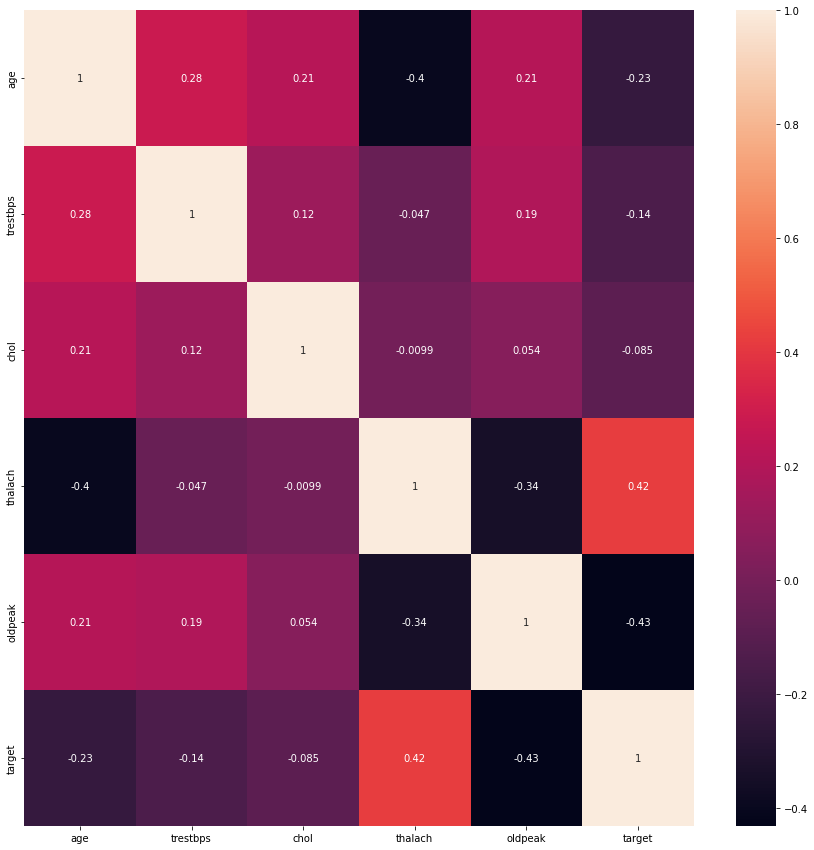

In [35]:
corr = data.corr()
fig = plt.figure(figsize = (15,15))
sns.heatmap(corr, annot = True)
plt.show()

Resting blood pressure, cholestoral, and "oldpeak" have moderate relationship with age.

## Data Preprocessing

We will prepare the dataset before building the machine learning models.

### One-Hot Encoding

In [36]:
# --- Creating Dummy Variables for cp, thal and slope ---

cp = pd.get_dummies(data['cp'], prefix = 'cp')
thal = pd.get_dummies(data['thal'], prefix = 'thal')
slope = pd.get_dummies(data['slope'], prefix = 'slope')

# --- Merge Dummy Variables to Main Data Frame ---

frames = [data, cp, thal, slope]
data = pd.concat(frames, axis = 1)

In [37]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


### Dropping Unnecessary Variables

The variables that unnecessary will be deleted.

In [38]:
data.drop(columns = ['cp', 'thal', 'slope'], inplace = True)

In [39]:
data.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


### Features Separating

In [40]:
X = data.drop(['target'], axis = 1)
y = data['target']

### Data Normalization

We will use **min-max normalization**.

**Min-max normalization** is often known as feature scaling where **the values of a numeric range of a feature of data, are reduced to a scale between 0 and 1**.

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
# --- Data Normalization using Min-Max Method ---
X = MinMaxScaler().fit_transform(X)

### Splitting the Dataset

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 123)

# Machine learning Models

Here, we will implement various machine learning models and try to find algorithm which predict accurately.

1. Logistic Regression
2. K-Nearest Neighbour
3. Support Vector Machine (SVM)
4. Gaussian Naive Bayes
5. Decision Tree
6. Random Forest
7. Gradient Boosting
8. Extreme Gradient Boosting
9. Models comparaison

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from xgboost import XGBClassifier

### 1. Logistic Regression

In [46]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",round(lr_acc*100, 2),'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[39 12]
 [ 8 41]]


Accuracy of Logistic Regression: 80.0 

              precision    recall  f1-score   support

           0       0.83      0.76      0.80        51
           1       0.77      0.84      0.80        49

    accuracy                           0.80       100
   macro avg       0.80      0.80      0.80       100
weighted avg       0.80      0.80      0.80       100



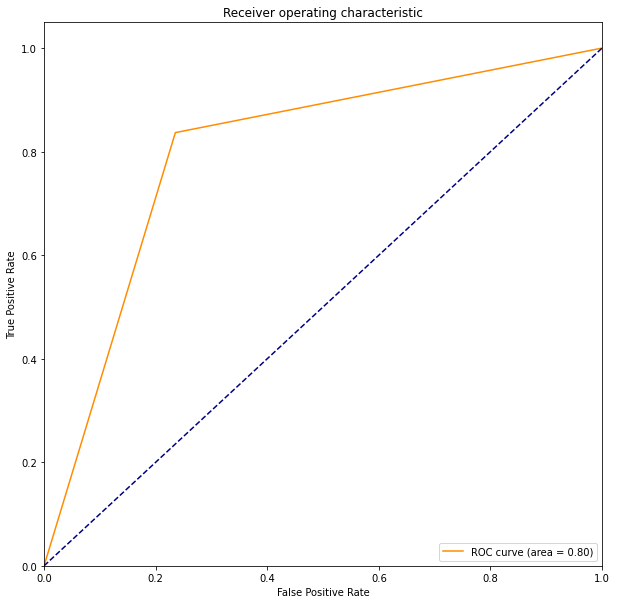

In [47]:
# ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, lr_predict)

plt.figure(figsize = (10,10))
plt.plot(fpr, tpr, color = "darkorange", label = "ROC curve (area = %0.2f)" % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color = "navy", linestyle = "--")
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc = "lower right")
plt.show()

### 2. K-Nearest Neighbour

In [48]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predict)
knn_acc = accuracy_score(y_test, knn_predict)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-Nearest Neighbour:",round(knn_acc*100, 2),'\n')
print(classification_report(y_test,knn_predict))

confussion matrix
[[38 13]
 [11 38]]


Accuracy of K-Nearest Neighbour: 76.0 

              precision    recall  f1-score   support

           0       0.78      0.75      0.76        51
           1       0.75      0.78      0.76        49

    accuracy                           0.76       100
   macro avg       0.76      0.76      0.76       100
weighted avg       0.76      0.76      0.76       100



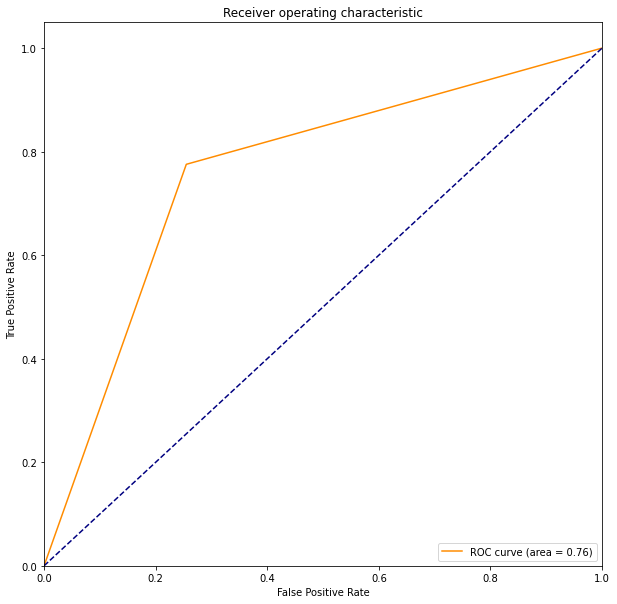

In [49]:
# ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, knn_predict)

plt.figure(figsize = (10,10))
plt.plot(fpr, tpr, color = "darkorange", label = "ROC curve (area = %0.2f)" % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color = "navy", linestyle = "--")
plt.xlim([0.0, 1]) 
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc = "lower right")
plt.show()

### 3. Support Vector Machine (SVM)

In [50]:
svm = SVC()
svm.fit(X_train, y_train)
svm_predict = svm.predict(X_test)
svm_conf_matrix = confusion_matrix(y_test, svm_predict)
svm_acc = accuracy_score(y_test, svm_predict)
print("confussion matrix")
print(svm_conf_matrix)
print("\n")
print("Accuracy of Support Vector Machine:",round(svm_acc*100, 2),'\n')
print(classification_report(y_test,svm_predict))

confussion matrix
[[35 16]
 [ 8 41]]


Accuracy of Support Vector Machine: 76.0 

              precision    recall  f1-score   support

           0       0.81      0.69      0.74        51
           1       0.72      0.84      0.77        49

    accuracy                           0.76       100
   macro avg       0.77      0.76      0.76       100
weighted avg       0.77      0.76      0.76       100



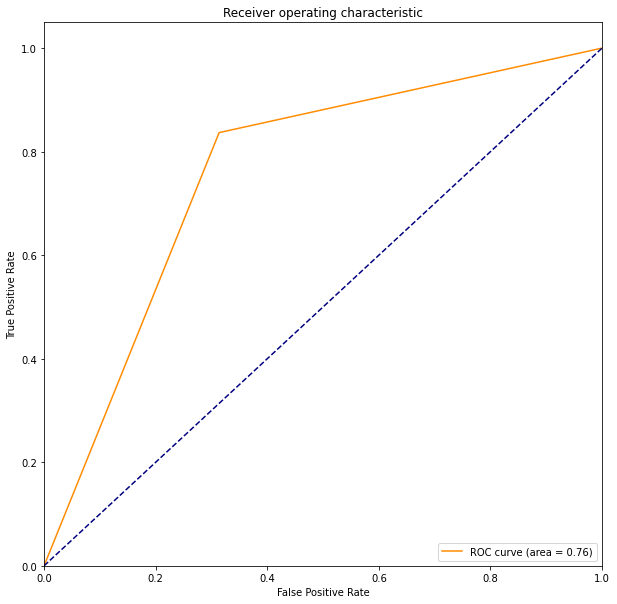

In [51]:
# ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, svm_predict)

plt.figure(figsize = (10,10))
plt.plot(fpr, tpr, color = "darkorange", label = "ROC curve (area = %0.2f)" % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color = "navy", linestyle = "--")
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc = "lower right")
plt.show()

### 4. Gaussian Naive Bayes

In [52]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_predict = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nb_predict)
nb_acc = accuracy_score(y_test, nb_predict)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Gaussian Naive Bayes:",round(nb_acc*100, 2),'\n')
print(classification_report(y_test,nb_predict))

confussion matrix
[[49  2]
 [28 21]]


Accuracy of Gaussian Naive Bayes: 70.0 

              precision    recall  f1-score   support

           0       0.64      0.96      0.77        51
           1       0.91      0.43      0.58        49

    accuracy                           0.70       100
   macro avg       0.77      0.69      0.67       100
weighted avg       0.77      0.70      0.68       100



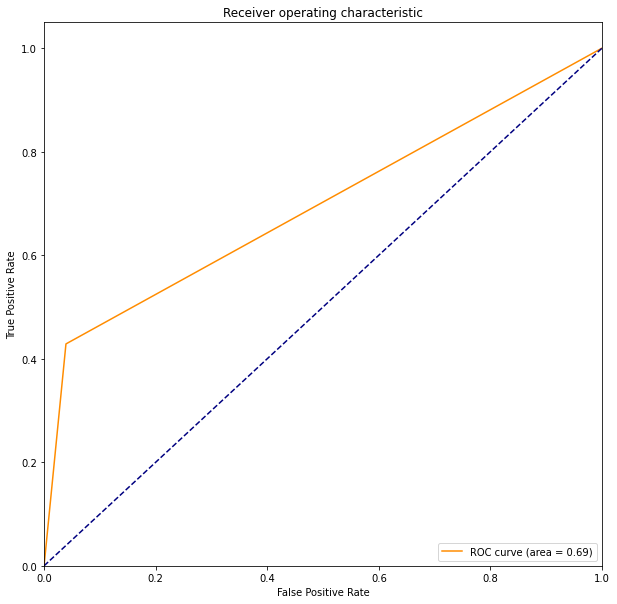

In [53]:
# ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, nb_predict)

plt.figure(figsize = (10,10))
plt.plot(fpr, tpr, color = "darkorange", label = "ROC curve (area = %0.2f)" % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color = "navy", linestyle = "--")
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc = "lower right")
plt.show()

### 5. Decision Tree

In [54]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree_predict = tree.predict(X_test)
tree_conf_matrix = confusion_matrix(y_test, tree_predict)
tree_acc = accuracy_score(y_test, tree_predict)
print("confussion matrix")
print(tree_conf_matrix)
print("\n")
print("Accuracy of Decision Tree:",round(tree_acc*100, 2),'\n')
print(classification_report(y_test,tree_predict))

confussion matrix
[[36 15]
 [13 36]]


Accuracy of Decision Tree: 72.0 

              precision    recall  f1-score   support

           0       0.73      0.71      0.72        51
           1       0.71      0.73      0.72        49

    accuracy                           0.72       100
   macro avg       0.72      0.72      0.72       100
weighted avg       0.72      0.72      0.72       100



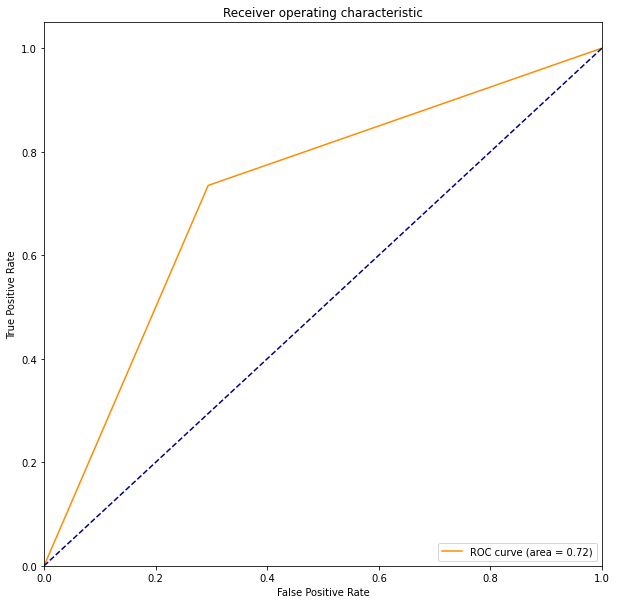

In [55]:
# ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, tree_predict)

plt.figure(figsize = (10,10))
plt.plot(fpr, tpr, color = "darkorange", label = "ROC curve (area = %0.2f)" % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color = "navy", linestyle = "--")
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc = "lower right")
plt.show()

### 6. Random Forest

In [56]:
forest = RandomForestClassifier(n_estimators = 1000, max_leaf_nodes = 20, min_samples_split = 15)
forest.fit(X_train, y_train)
forest_predict = forest.predict(X_test)
forest_conf_matrix = confusion_matrix(y_test, forest_predict)
forest_acc = accuracy_score(y_test, forest_predict)
print("confussion matrix")
print(forest_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",round(forest_acc*100, 2),'\n')
print(classification_report(y_test,forest_predict))

confussion matrix
[[38 13]
 [ 7 42]]


Accuracy of Random Forest: 80.0 

              precision    recall  f1-score   support

           0       0.84      0.75      0.79        51
           1       0.76      0.86      0.81        49

    accuracy                           0.80       100
   macro avg       0.80      0.80      0.80       100
weighted avg       0.80      0.80      0.80       100



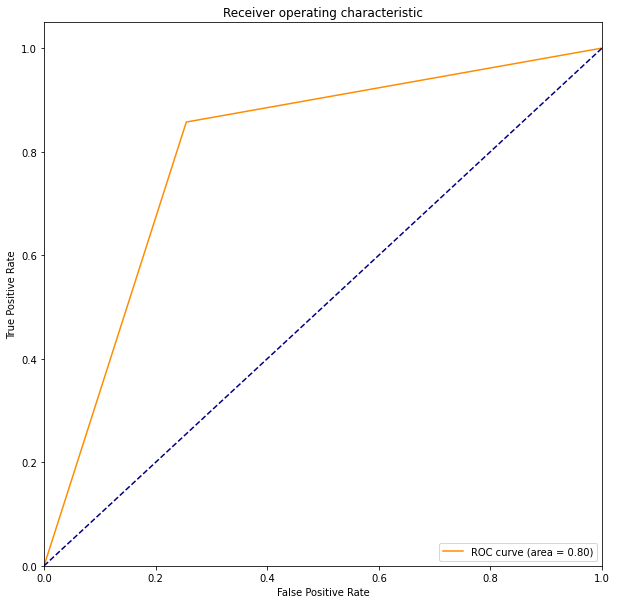

In [57]:
# ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, forest_predict)

plt.figure(figsize = (10,10))
plt.plot(fpr, tpr, color = "darkorange", label = "ROC curve (area = %0.2f)" % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color = "navy", linestyle = "--")
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc = "lower right")
plt.show()

### 7. Gradient Boosting

In [58]:
GBC = GradientBoostingClassifier(n_estimators = 100)
GBC.fit(X_train, y_train)
GBC_predict = GBC.predict(X_test)
GBC_conf_matrix = confusion_matrix(y_test, GBC_predict)
GBC_acc = accuracy_score(y_test, GBC_predict)
print("confussion matrix")
print(GBC_conf_matrix)
print("\n")
print("Accuracy of Gradient Boosting:",round(GBC_acc*100, 2),'\n')
print(classification_report(y_test,GBC_predict))

confussion matrix
[[33 18]
 [ 8 41]]


Accuracy of Gradient Boosting: 74.0 

              precision    recall  f1-score   support

           0       0.80      0.65      0.72        51
           1       0.69      0.84      0.76        49

    accuracy                           0.74       100
   macro avg       0.75      0.74      0.74       100
weighted avg       0.75      0.74      0.74       100



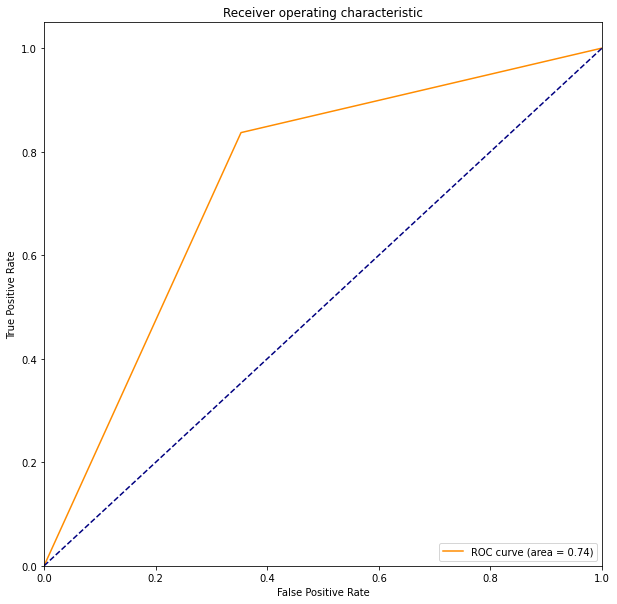

In [59]:
# ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, GBC_predict)

plt.figure(figsize = (10,10))
plt.plot(fpr, tpr, color = "darkorange", label = "ROC curve (area = %0.2f)" % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color = "navy", linestyle = "--")
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc = "lower right")
plt.show()

### 8. Extreme Gradient Boosting

In [60]:
XGBC = XGBClassifier(n_estimators = 1000)
XGBC.fit(X_train, y_train)
XGBC_predict = XGBC.predict(X_test)
XGBC_conf_matrix = confusion_matrix(y_test, XGBC_predict)
XGBC_acc = accuracy_score(y_test, XGBC_predict)
print("confussion matrix")
print(XGBC_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boosting:",round(XGBC_acc*100, 2),'\n')
print(classification_report(y_test,XGBC_predict))

confussion matrix
[[35 16]
 [ 7 42]]


Accuracy of Extreme Gradient Boosting: 77.0 

              precision    recall  f1-score   support

           0       0.83      0.69      0.75        51
           1       0.72      0.86      0.79        49

    accuracy                           0.77       100
   macro avg       0.78      0.77      0.77       100
weighted avg       0.78      0.77      0.77       100



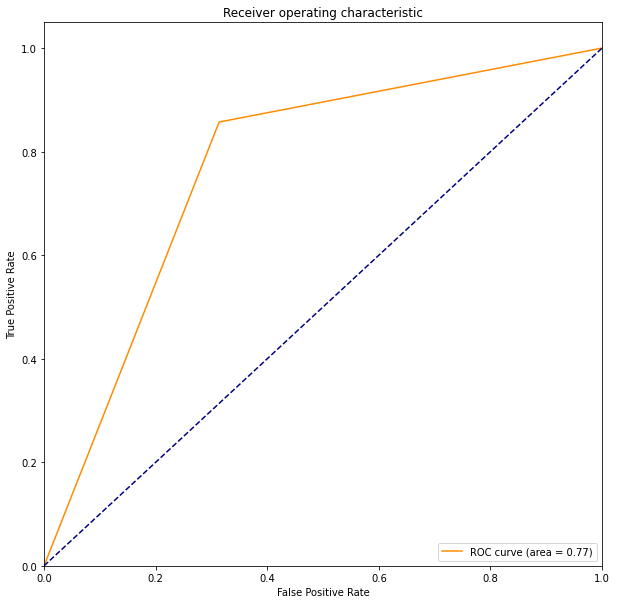

In [61]:
# ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, XGBC_predict)

plt.figure(figsize = (10,10))
plt.plot(fpr, tpr, color = "darkorange", label = "ROC curve (area = %0.2f)" % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color = "navy", linestyle = "--")
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc = "lower right")
plt.show()

### 9. Models comparaison

In [62]:
# --- Create Accuracy Comparison Table ---
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector Machine', 
                                  'Gaussian Naive Bayes', 'Decision Tree', 'Random Forest', 'Gradient Boosting',
                                  'Extreme Gradient Boosting'], 
                        'Accuracy': [lr_acc*100, knn_acc*100, svm_acc*100, nb_acc*100, tree_acc*100, forest_acc*100, 
                                     GBC_acc*100, XGBC_acc*100]})

# --- Create Accuracy Comparison Table ---
compare.sort_values(by = 'Accuracy', ascending = False)

,Model,Accuracy
0,Logistic Regression,80.0
5,Random Forest,80.0
7,Extreme Gradient Boosting,77.0
1,K-Nearest Neighbour,76.0
2,Support Vector Machine,76.0
6,Gradient Boosting,74.0
4,Decision Tree,72.0
3,Gaussian Naive Bayes,70.0
